In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Plot examples

In [2]:
from pmd_beamphysics import ParticleGroup, particle_paths
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,6)

from h5py import File
import os

In [3]:
# Open a file, fine the particle paths from the root attributes
# Pick one:
H5FILE = 'data/bmad_particles2.h5'
#H5FILE = 'data/distgen_particles.h5'
#H5FILE = 'data/astra_particles.h5'

# Load
h5 = File(H5FILE, 'r')
ppaths = particle_paths(h5)
ph5 = h5[ppaths[0]]

P = ParticleGroup(ph5)
ppaths

['/data/00001/particles/']

In [4]:
dict(h5.attrs)

{'basePath': b'/data/%T/',
 'dataType': b'openPMD',
 'date': b'2019-12-08 19:13:01',
 'latticeFile': b'cu_hxr.lat.bmad',
 'openPMD': b'2.0.0',
 'openPMDextension': b'BeamPhysics;SpeciesType',
 'particlesPath': b'particles/',
 'software': b'Bmad',
 'softwareVersion': b'1.0'}

# Slice statistics

In [5]:
from pmd_beamphysics.plot import slice_plot

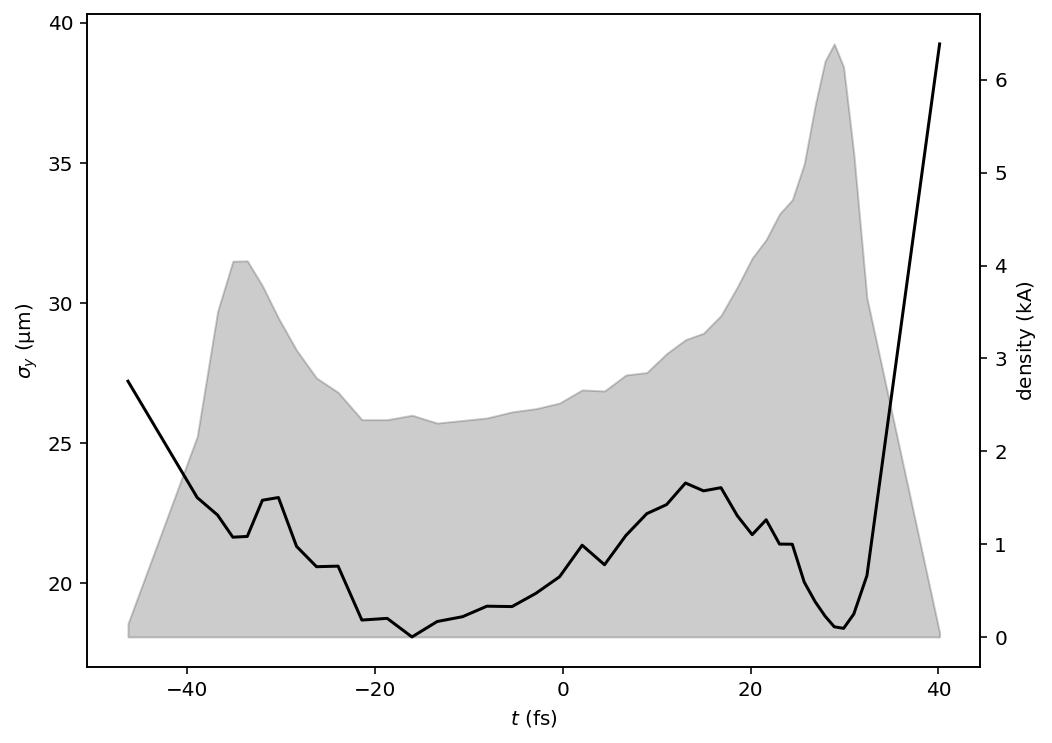

In [6]:
P.t = P.t - P['mean_t']
slice_plot(P, 'sigma_y', slice_key='t');

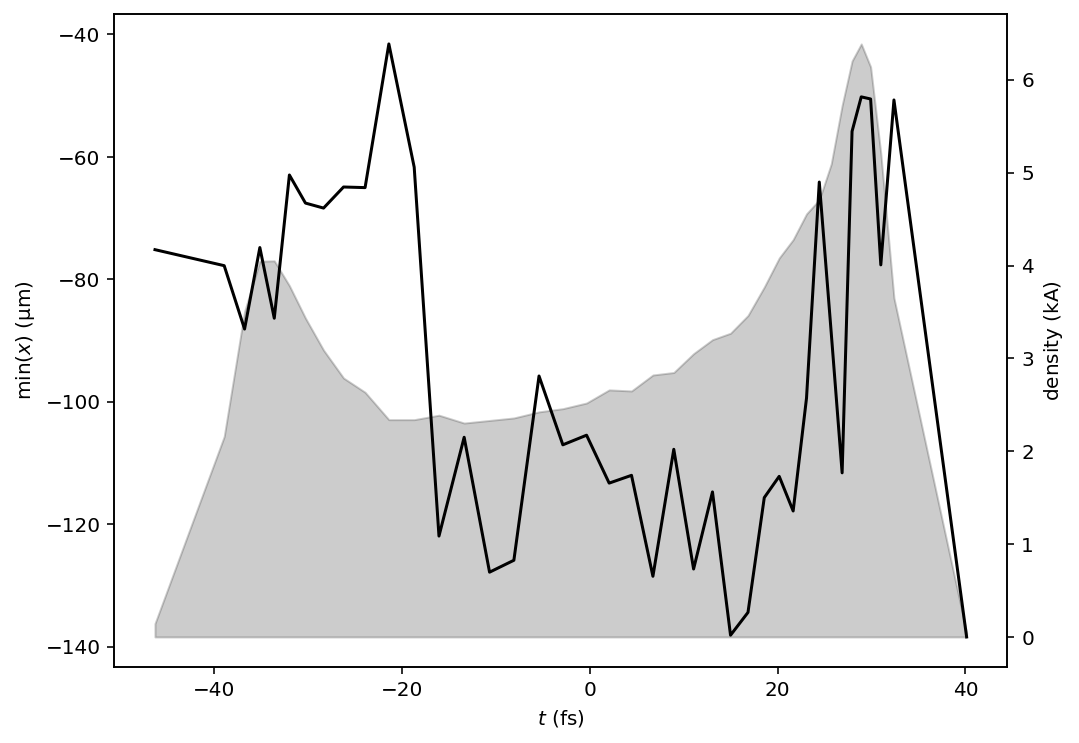

In [7]:
slice_plot(P, 'min_x', slice_key='t');

# Density plots

In [8]:
from pmd_beamphysics.plot import marginal_plot, density_plot

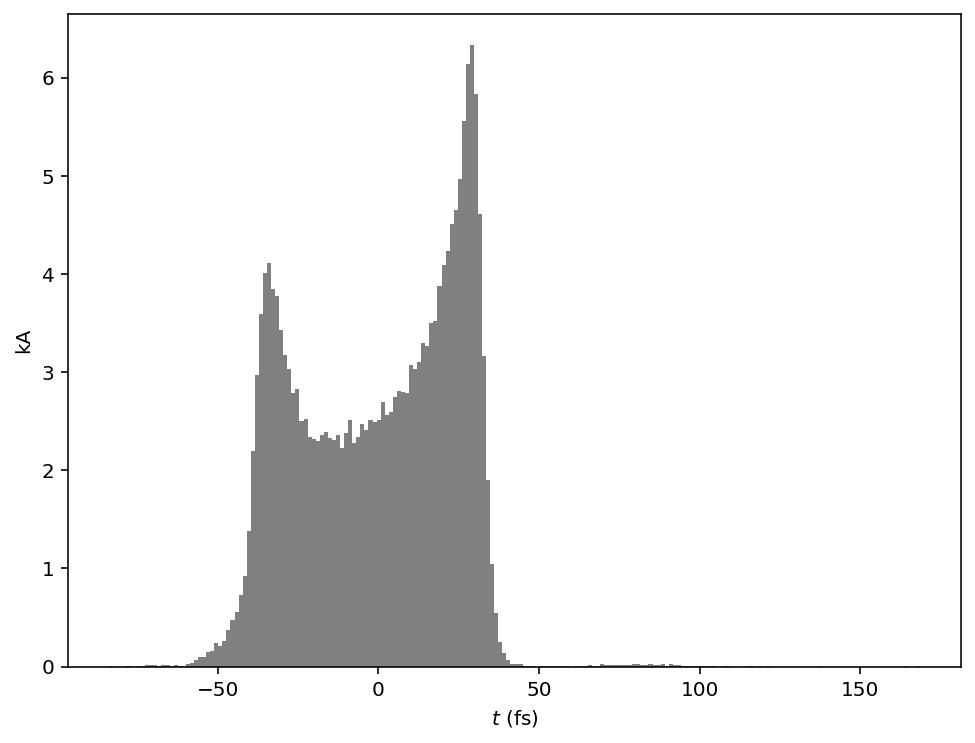

In [9]:
density_plot(P, 't', bins=200);

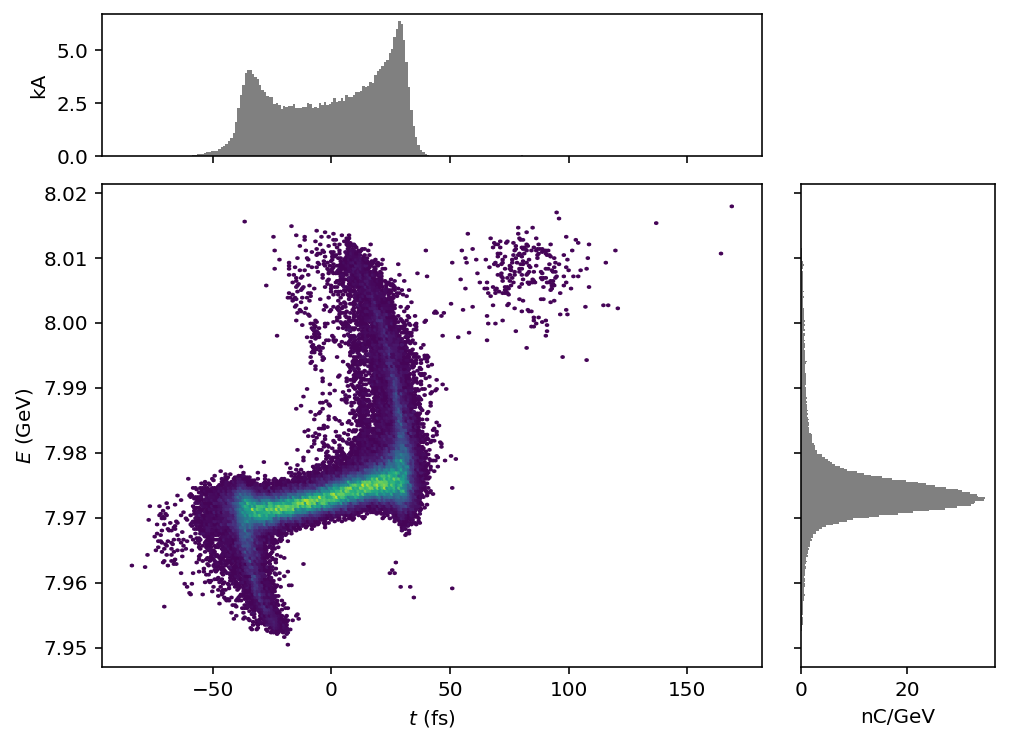

In [10]:
marginal_plot(P, 't', 'energy', bins=250);

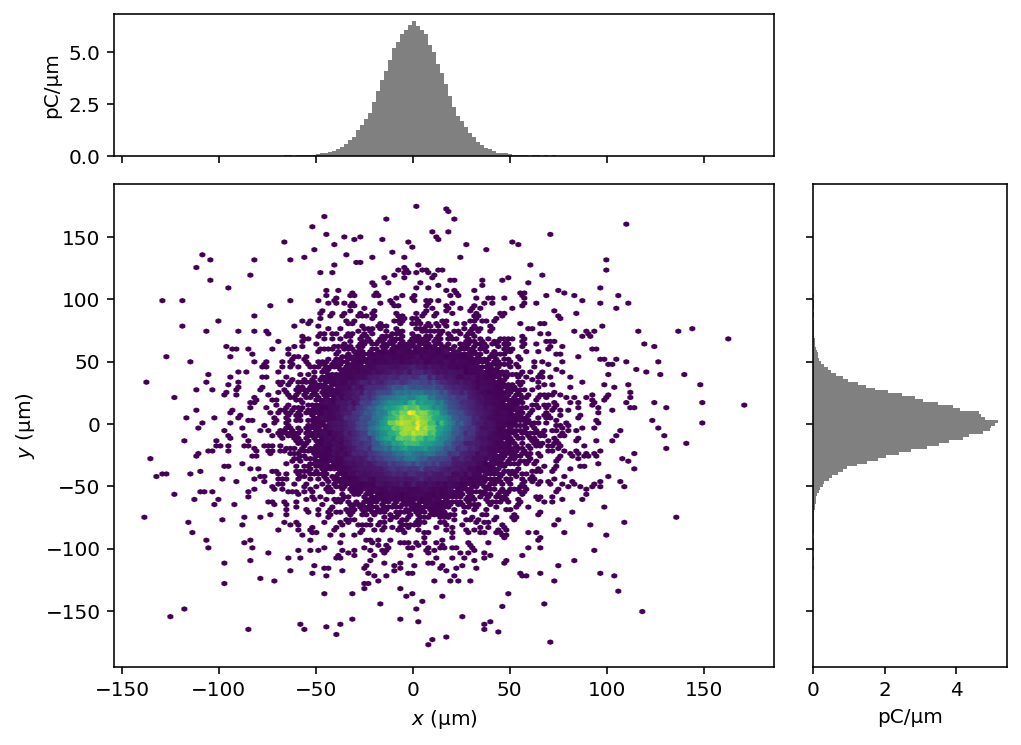

In [11]:
marginal_plot(P, 'x', 'y', bins=150);

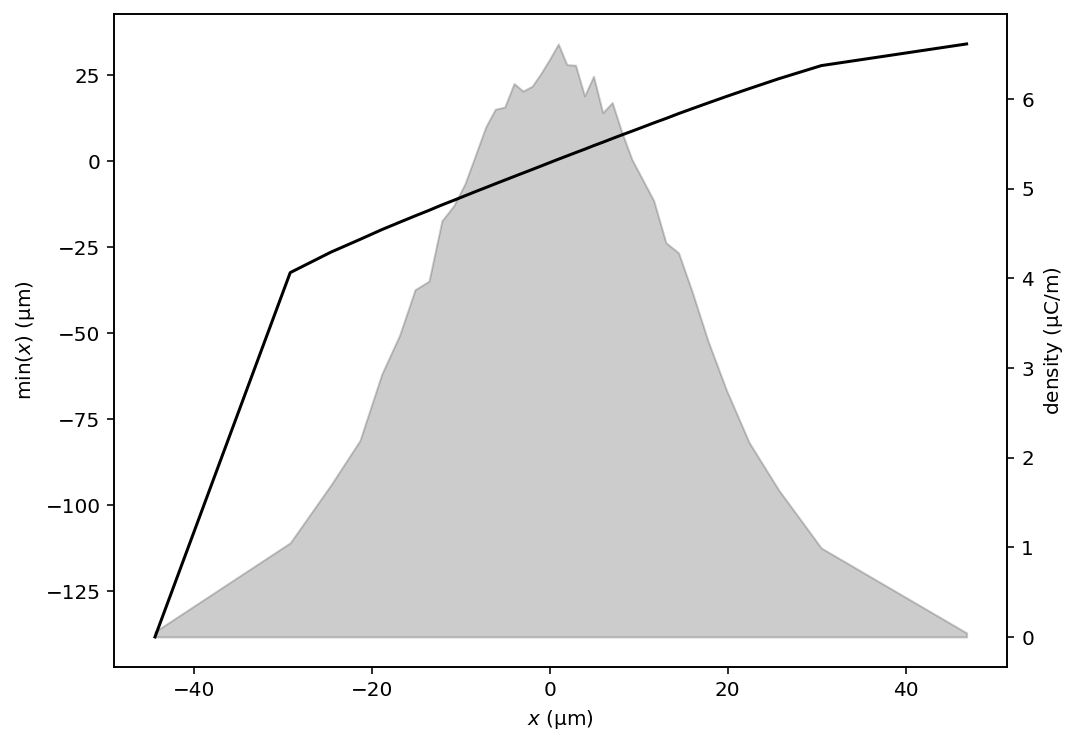

In [12]:
slice_plot(P, 'min_x', slice_key='x');

# Combined density and slice plot

In [13]:
from pmd_beamphysics.plot import density_and_slice_plot

In [14]:
P.species

'electron'

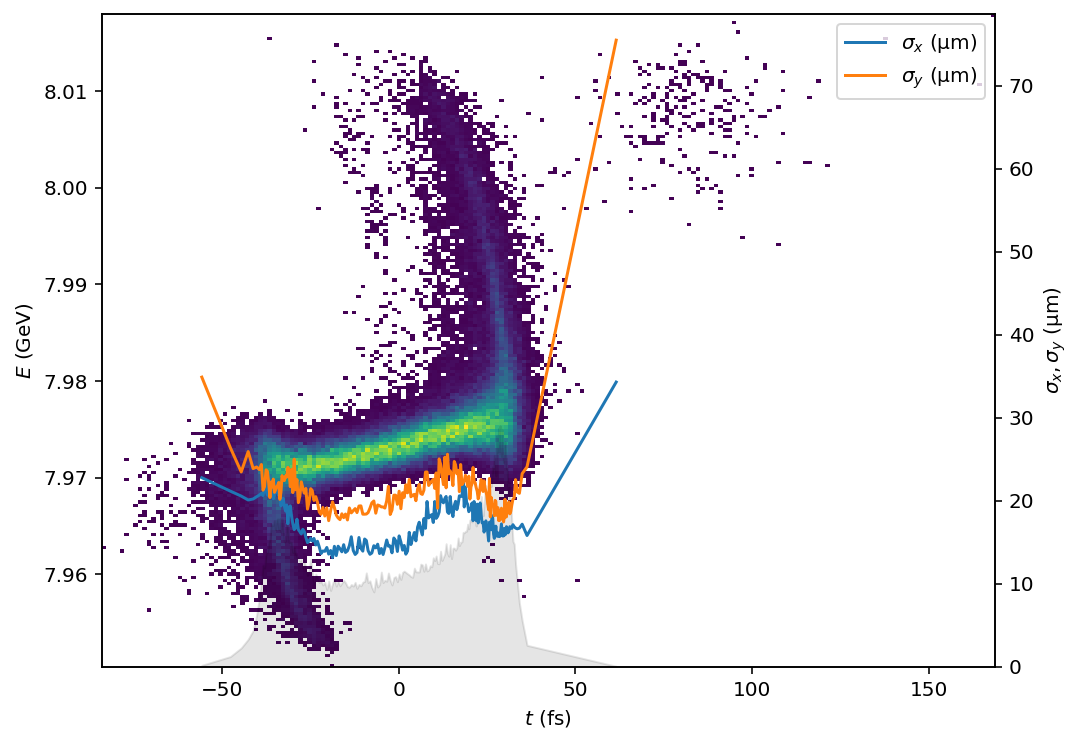

In [15]:
density_and_slice_plot(P, 't', 'energy', stat_keys = ['sigma_x', 'sigma_y'], n_slice = 200, bins=200)